## K Means Clustering Implementation

In [17]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [18]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2)

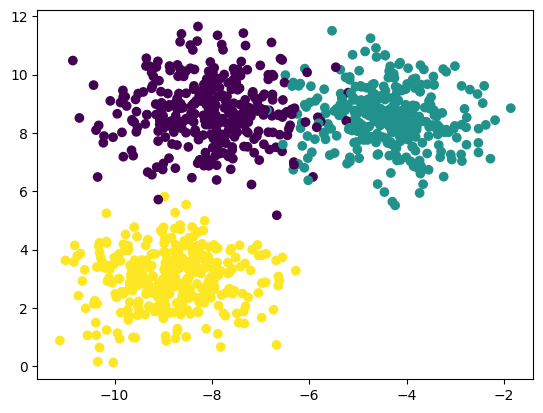

In [19]:
plt.scatter(X[:,0],X[:,1],c=y)

In [20]:
## standardization--feature scaling technique
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [22]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [23]:
from sklearn.cluster import KMeans
## Elbow method To select K Value
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

In [24]:
wcss

[1339.9999999999993,
 545.0348058543286,
 210.62026297950064,
 180.15632064458723,
 146.7444436407191,
 134.5661657367124,
 110.2552502814575,
 98.17580491652365,
 88.41971382637358,
 81.2354772464989]

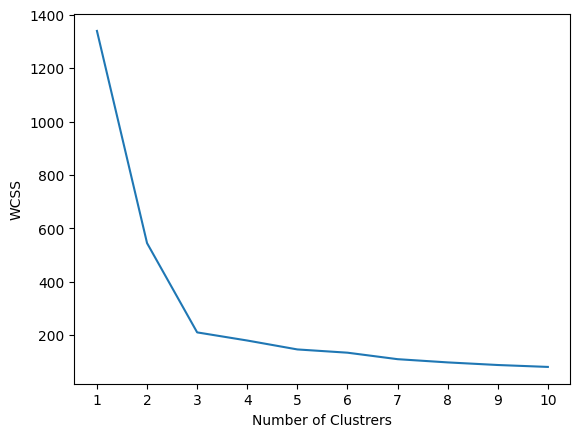

In [25]:
## plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clustrers")
plt.ylabel("WCSS")
plt.show()

In [26]:
kmeans=KMeans(n_clusters=3,init="k-means++")
kmeans.fit_predict(X_train_scaled)
y_pred=kmeans.predict(X_test_scaled)

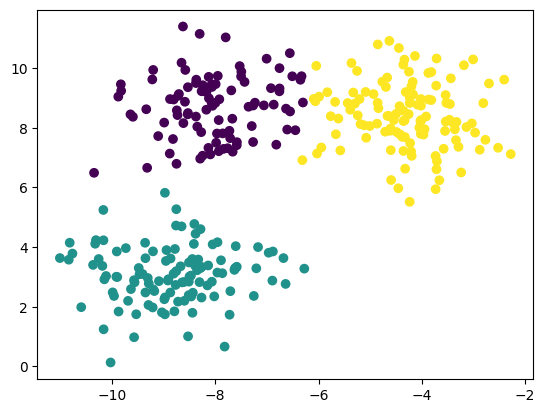

In [27]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)

In [28]:
## Validating the k value
## kneelocator
## Silhoutee scoring

In [29]:
from kneed import KneeLocator
kl=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")
kl.elbow

np.int64(3)

In [30]:
## silhoutte score
from sklearn.metrics import silhouette_score
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    score=silhouette_score(X_train_scaled,kmeans.labels_)
    silhouette_coefficients.append(score)

In [31]:
silhouette_coefficients

[np.float64(0.5500822046780582),
 np.float64(0.6071748444208531),
 np.float64(0.49955651620065894),
 np.float64(0.4117723267761026),
 np.float64(0.3452234821575469),
 np.float64(0.3405697311420177),
 np.float64(0.3450004037802834),
 np.float64(0.34242118096881236),
 np.float64(0.341325636126632)]

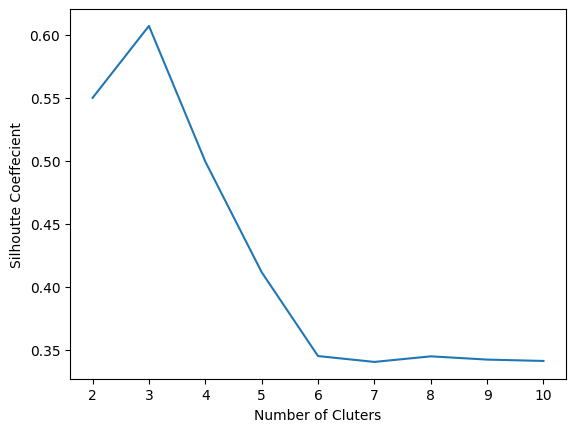

In [32]:
## plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()